In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import LogLocator

In [2]:
import NNMFit
from NNMFit.utilities.readout_graphs import HistogramGraph
from NNMFit.core.analysis_config import AnalysisConfig


In [3]:
config_dir = "/data/user/tvaneede/GlobalFit/reco_processing/NNMFit/configs/flavor_neha"
config_hdl = AnalysisConfig.from_configs(
        main_config_file=f"{config_dir}/main.cfg",
        analysis_config_file = f"{config_dir}/analysis_configs/asimov/SAY/asimov_SAY_Oliver_weights.yaml",
        override_dict=None,
        config_dir=config_dir,
        override_config_files=["override/Systematics/NoSystematics.cfg",
                               "override/ftp/taureco_v4_retrain_zheyang_length-10_energy-60e3_v1.cfg",
                               "override/Binning/all_energy_zenith_bins_oliver_check.cfg",
                               "override/ftp/no_muons.cfg"],
        override_components_files=None,
        override_parameters_files=None)

In [4]:
# build a histogram
hist_graph_hdl = HistogramGraph(config_hdl)

In [5]:
det_configs = [
    "IC86_pass2_SnowStorm_v2_Bfr_DoubleCascades",
    "IC86_pass2_SnowStorm_v2_Bfr_Cascades",
    "IC86_pass2_SnowStorm_v2_Bfr_Tracks",
]

---------- IC86_pass2_SnowStorm_v2_Bfr_DoubleCascades
---------- IC86_pass2_SnowStorm_v2_Bfr_Cascades
---------- IC86_pass2_SnowStorm_v2_Bfr_Tracks


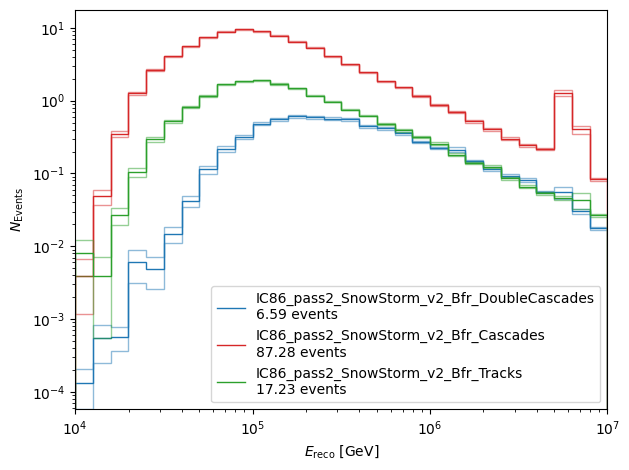

In [6]:
input_variables = {
  "gamma_astro": 2.52,
  "astro_norm": 1.8,
#   "gamma_astro": 2.87,
#   "astro_norm": 2.1233,
  "astro_nue_ratio": 1.0,
  "astro_nutau_ratio": 1.0,
  "prompt_norm": 0.0,
  "conv_norm": 0.0,
  "CR_grad" : 1.0
}

# 1d energy icecube
fig, (ax1) = plt.subplots(1, 1)

colors = ["C0", "C3", "C2"]

for i,det_config in enumerate(det_configs):

    res = hist_graph_hdl.get_evaled_histogram(
        input_variables=input_variables, det_config=det_config, reshape=True
    )

    temp = hist_graph_hdl.get_binning(det_config=det_config)
    bins_energy = temp["reco_energy"]

    print(10*"-", det_config)

    # energy: axis=1
    hist = res["mu"].sum(axis=1)
    yerror = np.sqrt(res["ssq"].sum(axis=1))

    ax1.stairs(values=hist, edges=bins_energy, color = colors[i], label=f"{det_config}\n{sum(hist):.2f} events")
    ax1.stairs(values=hist+yerror, edges=bins_energy, baseline=hist-yerror, alpha=0.5, color = colors[i])


# setup figure
ax1.set_xlabel(r"$E_{\rm reco}$ [GeV]")
ax1.set_ylabel(r"$N_{\mathrm{Events}}$")
ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_xlim(bins_energy[0], bins_energy[-1])
ax1.legend()

# plt.savefig(f"/data/user/tvaneede/GlobalFit/analysis/combined_track_shower/plots/output/ereco_{det_config}_norm{input_params['astro_norm']}_gamma{input_params['gamma_astro']}.pdf")

fig.tight_layout()
plt.show()

In [27]:
inputs = {
"track_cscd_nohybrid_bestfit" : {
    'astro_norm': 1.776,
    'gamma_astro': 2.527,
},

"track_bestfit" : {
    'astro_norm': 1.748,
    'gamma_astro': 2.440,
},

"track_cscd_nohybrid_he_nominal_bestfit" : {
    'astro_norm': 1.796,
    'gamma_astro': 2.517,
},

"track_he_nominal_bestfit" : {
    'astro_norm': 1.705,
    'gamma_astro': 2.395,
}
}

In [29]:
for key, input_params in inputs.items():
    res = hist_graph_hdl.get_evaled_histogram(input_variables=input_params, det_config=det_config, reshape=True)
    hist = res["mu"].sum(axis=1)
    print(key, sum(hist))

track_cscd_nohybrid_bestfit 0.0008078826364935633
track_bestfit 0.0012846563036700742
track_cscd_nohybrid_he_nominal_bestfit 0.0008630824937478414
track_he_nominal_bestfit 0.0016089305350164213


In [14]:
# Apply the custom style
plt.style.use('/data/user/tvaneede/plotting_style/km3net.mplstyle')

In [ ]:
# get binning for icecube
det_config = "IC86_pass2_SnowStorm_v2_Bfr_DoubleCascades_3D_binning"

res = hist_graph_hdl.get_evaled_histogram(
    input_variables=input_params, det_config=det_config, reshape=True
)

temp = hist_graph_hdl.get_binning(det_config=det_config)
bins_energy = temp["reco_energy"]
bins_zenith = temp["reco_zenith"]

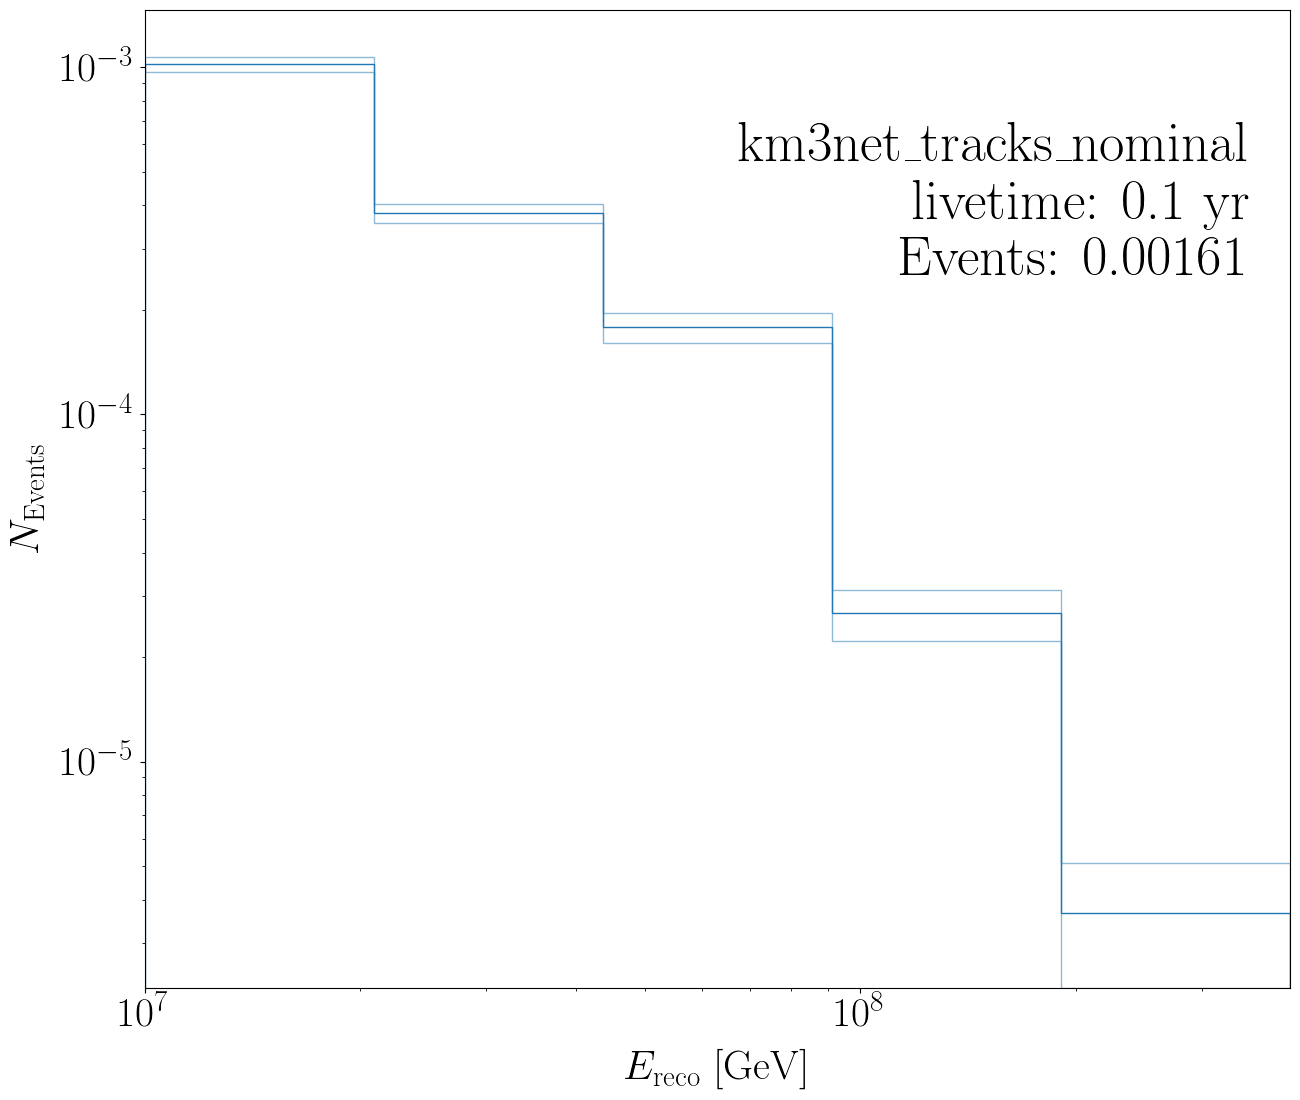

In [30]:
# 1d energy icecube
fig, (ax1) = plt.subplots(1, 1)

# energy: axis=1
hist = res["mu"].sum(axis=1)
yerror = np.sqrt(res["ssq"].sum(axis=1))

ax1.stairs(values=hist, edges=bins_energy, color="C0")
ax1.stairs(values=hist+yerror, edges=bins_energy, baseline=hist-yerror, alpha=0.5, color="C0")

# # the he event
# ax1.plot([6e7,6e7],[0, 2*max(hist)], color="black")
# ax1.plot([11e7,11e7],[0, 2*max(hist)], color="black")
# ax1.plot([32e7,32e7],[0, 2*max(hist)], color="black")

# some text
plt.text(3.5e8, 2.5e-4, f"{det_config}\nlivetime: 0.1 yr\nEvents: {sum(hist):.5f}",
         horizontalalignment='right',)

# setup figure
ax1.set_xlabel(r"$E_{\rm reco}$ [GeV]")
ax1.set_ylabel(r"$N_{\mathrm{Events}}$")
ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_xlim(bins_energy[0], bins_energy[-1])

plt.savefig(f"/data/user/tvaneede/GlobalFit/analysis/combined_track_shower/plots/output/ereco_{det_config}_norm{input_params['astro_norm']}_gamma{input_params['gamma_astro']}.pdf")

fig.tight_layout()
plt.show()